In [1]:
import torch
import os
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import yaml

In [2]:
!pip install opendatasets
import opendatasets as ods
ods.download("https://www.kaggle.com/datasets/nargeskarimii/various-materials-from-historic-buildings")

Dataset URL: https://www.kaggle.com/datasets/nargeskarimii/various-materials-from-historic-buildings


100%|██████████| 224M/224M [00:02<00:00, 81.3MB/s]


In [3]:
# YOLOv10
!pip install -q git+https://github.com/THU-MIG/yolov10.git
!mkdir -p /kaggle/working/yolov10/weights
!wget -P /kaggle/working/yolov10/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10m.pt

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 14.4 MB/s eta 0:00:00


In [4]:
!pip install supervision
import supervision
import ultralytics
from ultralytics import YOLOv10 as YOLO
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import PIL
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt
from glob import glob
import random
import cv2
import warnings
import os
warnings.simplefilter('ignore')
os.environ['WANDB_DISABLED'] = 'true'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 4.1 MB/s eta 0:00:00


In [5]:
class CFG:
    EPOCHS = 50
    BATCH_SIZE = 32
    SEED = 6
    LEARNING_RATE = 0.001
    NUM_SAMPLES = 16
    OPTIMIZER = 'Adam'

    DATA_PATH = '/content/various-materials-from-historic-buildings/MAIN DATASET CRACK DETECTION/MAIN DATASET/crack detection concrete.v10i.yolov5pytorch/data.yaml'
    SAMPLE_PATH = '/content/various-materials-from-historic-buildings/MAIN DATASET CRACK DETECTION/MAIN DATASET/crack detection concrete.v10i.yolov5pytorch/test/images/*'

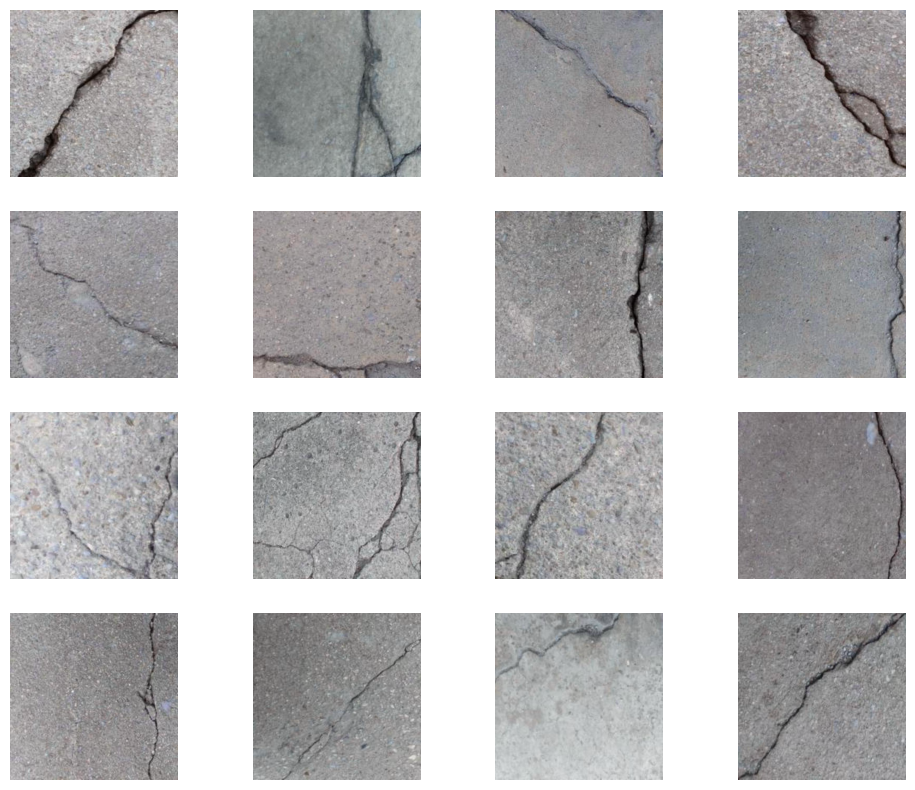

In [6]:
images_data = glob(CFG.SAMPLE_PATH)
random_image = random.sample(images_data, CFG.NUM_SAMPLES)

plt.figure(figsize=(12,10))
for i in range(CFG.NUM_SAMPLES):
    plt.subplot(4,4,i+1)
    plt.imshow(cv2.imread(random_image[i]))
    plt.axis('off')

In [7]:
yolo_v10 = YOLO('/kaggle/working/yolov10/weights/yolov10m.pt')

In [8]:
yolo_v10

YOLOv10(
  (model): YOLOv10DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(48, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(48, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(96, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(192, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, trac

In [9]:
v10_model = yolo_v10.train(data=CFG.DATA_PATH,seed=CFG.SEED,epochs=CFG.EPOCHS, lr0=CFG.LEARNING_RATE, optimizer=CFG.OPTIMIZER, verbose=True,
    project='ft_models',
    name='yolo_v10')

New https://pypi.org/project/ultralytics/8.2.70 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/kaggle/working/yolov10/weights/yolov10m.pt, data=/content/various-materials-from-historic-buildings/MAIN DATASET CRACK DETECTION/MAIN DATASET/crack detection concrete.v10i.yolov5pytorch/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=None, workers=8, project=ft_models, name=yolo_v10, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=6, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, pl

100%|██████████| 755k/755k [00:00<00:00, 25.0MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1     78720  ultralytics.nn.modules.block.SCDown          [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1    228672  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 111MB/s]


AMP: checks passed ✅


train: Scanning /content/various-materials-from-historic-buildings/MAIN DATASET CRACK DETECTION/MAIN DATASET/crack detection concrete.v10i.yolov5pytorch/train/labels... 790 images, 0 backgrounds, 0 corrupt: 100%|██████████| 790/790 [00:00<00:00, 857.20it/s]


train: New cache created: /content/various-materials-from-historic-buildings/MAIN DATASET CRACK DETECTION/MAIN DATASET/crack detection concrete.v10i.yolov5pytorch/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/various-materials-from-historic-buildings/MAIN DATASET CRACK DETECTION/MAIN DATASET/crack detection concrete.v10i.yolov5pytorch/valid/labels... 215 images, 0 backgrounds, 0 corrupt: 100%|██████████| 215/215 [00:00<00:00, 627.94it/s]

val: New cache created: /content/various-materials-from-historic-buildings/MAIN DATASET CRACK DETECTION/MAIN DATASET/crack detection concrete.v10i.yolov5pytorch/valid/labels.cache


Plotting labels to ft_models/yolo_v10/labels.jpg... 
optimizer: Adam(lr=0.001, momentum=0.937) with parameter groups 129 weight(decay=0.0), 142 weight(decay=0.0005), 141 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to ft_models/yolo_v10
Starting training for 50 epochs...

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       1/50      9.29G      1.544      2.066      1.762       1.51      2.654      1.733         16        640: 100%|██████████| 50/50 [00:34<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.04s/it]

                   all        215        296      0.332      0.277      0.203     0.0664



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       2/50      9.44G      1.459      1.772      1.682      1.547      1.945      1.686         16        640: 100%|██████████| 50/50 [00:31<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.05it/s]

                   all        215        296     0.0988      0.108      0.029    0.00881



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       3/50      9.45G      1.444      1.719      1.661      1.493      1.947      1.652         19        640: 100%|██████████| 50/50 [00:30<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.12it/s]

                   all        215        296      0.171      0.209     0.0786     0.0246



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       4/50      9.44G      1.424      1.706       1.66      1.501      1.933      1.645         19        640: 100%|██████████| 50/50 [00:31<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.10it/s]

                   all        215        296      0.189      0.155     0.0771     0.0252



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       5/50      9.45G      1.388      1.674       1.62      1.435      1.981      1.595         19        640: 100%|██████████| 50/50 [00:31<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.14it/s]

                   all        215        296      0.362      0.193      0.144     0.0534



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       6/50      9.44G      1.348      1.639      1.605      1.402      1.953      1.571          9        640: 100%|██████████| 50/50 [00:31<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.07it/s]

                   all        215        296      0.439      0.419      0.352      0.152



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       7/50      9.45G      1.335      1.581      1.576      1.394      1.797      1.551         18        640: 100%|██████████| 50/50 [00:31<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.13it/s]

                   all        215        296      0.526      0.475       0.38      0.144



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       8/50      9.45G      1.345      1.618      1.594      1.416      1.844      1.579         19        640: 100%|██████████| 50/50 [00:31<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.13it/s]

                   all        215        296      0.572      0.601      0.573      0.281



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       9/50      9.45G      1.297      1.575      1.565      1.359      1.852      1.535         16        640: 100%|██████████| 50/50 [00:30<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.10it/s]

                   all        215        296      0.283      0.385        0.2      0.073



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      10/50      9.44G      1.292      1.561       1.55      1.321      1.798      1.504         14        640: 100%|██████████| 50/50 [00:30<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.08it/s]

                   all        215        296      0.573      0.591      0.562      0.269



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      11/50      9.48G      1.239      1.496      1.516       1.29      1.714      1.482         17        640: 100%|██████████| 50/50 [00:31<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.12it/s]

                   all        215        296      0.535      0.595      0.503      0.219



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      12/50      9.45G      1.234      1.454      1.505      1.278      1.638      1.471         20        640: 100%|██████████| 50/50 [00:31<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.12it/s]

                   all        215        296      0.687      0.611      0.657      0.334



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      13/50      9.46G      1.229      1.445      1.487      1.279      1.661      1.467         16        640: 100%|██████████| 50/50 [00:31<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.12it/s]

                   all        215        296      0.691      0.604       0.68      0.359



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      14/50      9.45G       1.21      1.435      1.484      1.277       1.63      1.476         16        640: 100%|██████████| 50/50 [00:30<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.12it/s]

                   all        215        296      0.695      0.551      0.624      0.325



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      15/50      9.47G      1.129      1.383      1.442      1.222      1.578      1.427         10        640: 100%|██████████| 50/50 [00:31<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.09it/s]

                   all        215        296      0.717      0.609      0.712      0.426



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      16/50      9.47G      1.168        1.4      1.456      1.243       1.59      1.445         22        640: 100%|██████████| 50/50 [00:30<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.08it/s]

                   all        215        296      0.697      0.683      0.746      0.473



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      17/50      9.46G      1.138      1.365      1.442      1.206      1.553      1.419         19        640: 100%|██████████| 50/50 [00:31<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.08it/s]

                   all        215        296      0.668      0.632      0.637      0.367



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      18/50      9.47G      1.115       1.35      1.442      1.192      1.536      1.425         18        640: 100%|██████████| 50/50 [00:30<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.08it/s]

                   all        215        296       0.74      0.672      0.765       0.44



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      19/50      9.47G      1.078      1.308      1.399      1.175      1.481      1.399         18        640: 100%|██████████| 50/50 [00:31<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.12it/s]

                   all        215        296      0.696      0.703      0.739      0.461



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      20/50      9.45G      1.161      1.337      1.452      1.218      1.523      1.438         19        640: 100%|██████████| 50/50 [00:31<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.13it/s]

                   all        215        296      0.728      0.659      0.739      0.468



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      21/50      9.47G      1.125      1.327      1.412      1.171      1.521      1.395         16        640: 100%|██████████| 50/50 [00:30<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.08it/s]

                   all        215        296      0.727       0.72      0.777      0.499



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      22/50      9.45G      1.098       1.32      1.416      1.162      1.489      1.409         15        640: 100%|██████████| 50/50 [00:31<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.12it/s]

                   all        215        296      0.832      0.716      0.797      0.505



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      23/50      9.46G      1.077      1.265      1.424      1.155      1.428      1.406         17        640: 100%|██████████| 50/50 [00:31<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.11it/s]

                   all        215        296      0.762      0.696      0.763      0.498



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      24/50      9.44G      1.069      1.278       1.41      1.131      1.455      1.387         19        640: 100%|██████████| 50/50 [00:31<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.12it/s]

                   all        215        296      0.738      0.713       0.79      0.498



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      25/50      9.45G      1.053       1.22       1.37      1.117      1.407      1.352         17        640: 100%|██████████| 50/50 [00:31<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.10it/s]

                   all        215        296      0.675       0.73      0.726      0.482



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      26/50      9.44G      1.053      1.227      1.375      1.117      1.391      1.358         16        640: 100%|██████████| 50/50 [00:31<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.11it/s]

                   all        215        296      0.818      0.689      0.808      0.518



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      27/50      9.46G      1.028      1.212      1.378      1.104      1.378      1.362         13        640: 100%|██████████| 50/50 [00:30<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.12it/s]

                   all        215        296      0.765      0.715      0.779       0.49



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      28/50      9.46G      1.062      1.264      1.394      1.129      1.433      1.388         12        640: 100%|██████████| 50/50 [00:31<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.11it/s]

                   all        215        296      0.752      0.666      0.739       0.54



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      29/50      9.47G      1.025      1.218      1.374      1.113      1.368      1.365         17        640: 100%|██████████| 50/50 [00:30<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.07it/s]

                   all        215        296      0.794      0.715      0.798      0.543



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      30/50      9.44G       1.01      1.199      1.354      1.092      1.329      1.352         14        640: 100%|██████████| 50/50 [00:31<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.12it/s]

                   all        215        296      0.757      0.716        0.8      0.553



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      31/50      9.48G      1.018      1.156      1.352      1.101      1.288      1.354         17        640: 100%|██████████| 50/50 [00:31<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.11it/s]

                   all        215        296      0.859      0.678      0.807      0.532



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      32/50      9.43G      1.008      1.186       1.34      1.088      1.347      1.332         18        640: 100%|██████████| 50/50 [00:31<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.11it/s]

                   all        215        296      0.794      0.696      0.799      0.522



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      33/50      9.46G      1.014      1.162      1.342      1.074      1.304      1.331         20        640: 100%|██████████| 50/50 [00:31<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.10it/s]

                   all        215        296       0.81      0.733      0.824      0.562



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      34/50      9.44G     0.9923      1.162      1.344      1.066      1.315      1.341         24        640: 100%|██████████| 50/50 [00:30<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.12it/s]

                   all        215        296      0.827      0.716      0.795      0.575



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      35/50      9.46G     0.9599      1.118      1.317      1.023      1.267      1.317         16        640: 100%|██████████| 50/50 [00:30<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.10it/s]

                   all        215        296      0.838       0.75      0.846      0.601



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      36/50      9.46G     0.9586      1.136      1.319      1.019      1.285      1.297         17        640: 100%|██████████| 50/50 [00:30<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.12it/s]

                   all        215        296      0.833      0.706      0.819      0.597



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      37/50      9.47G     0.9686      1.131      1.348      1.032      1.295      1.326         17        640: 100%|██████████| 50/50 [00:30<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.08it/s]

                   all        215        296      0.774      0.798      0.851      0.591



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      38/50      9.44G     0.9572      1.118      1.328      1.009      1.283      1.307         12        640: 100%|██████████| 50/50 [00:31<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.12it/s]

                   all        215        296      0.783      0.756      0.824      0.584



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      39/50      9.46G      0.964      1.122      1.314       1.02      1.277      1.301         19        640: 100%|██████████| 50/50 [00:31<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.07it/s]

                   all        215        296      0.845      0.757      0.847      0.605



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      40/50      9.44G     0.9317      1.115      1.301      1.007      1.261      1.303         19        640: 100%|██████████| 50/50 [00:31<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.11it/s]

                   all        215        296      0.882       0.72      0.843      0.607


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      41/50      9.46G     0.9745      1.055      1.399      1.055      1.114      1.418          6        640: 100%|██████████| 50/50 [00:31<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.10it/s]

                   all        215        296      0.852       0.74      0.852      0.618



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      42/50      9.44G       0.92     0.8873      1.331      1.011     0.9353      1.371          9        640: 100%|██████████| 50/50 [00:30<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.06it/s]

                   all        215        296      0.816       0.78      0.839      0.601



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      43/50      9.46G     0.8932     0.7958      1.327     0.9624     0.8616      1.336          7        640: 100%|██████████| 50/50 [00:30<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.11it/s]

                   all        215        296      0.857      0.771      0.871      0.618



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      44/50      9.44G      0.865     0.7813      1.288     0.9706     0.8687      1.315          7        640: 100%|██████████| 50/50 [00:30<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.11it/s]

                   all        215        296      0.793      0.807      0.863      0.638



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      45/50      9.45G     0.8534     0.7898      1.292     0.9338     0.8611      1.314         16        640: 100%|██████████| 50/50 [00:30<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.06it/s]

                   all        215        296      0.847      0.784      0.874      0.657



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      46/50      9.44G      0.831     0.7715      1.286      0.894     0.8456      1.298          9        640: 100%|██████████| 50/50 [00:30<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.12it/s]

                   all        215        296      0.817      0.799      0.878       0.65



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      47/50      9.46G     0.8023     0.7568      1.255     0.8782     0.8448      1.277         10        640: 100%|██████████| 50/50 [00:30<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.06it/s]

                   all        215        296      0.873      0.777      0.877      0.647



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      48/50      9.44G     0.8119     0.7349      1.265     0.8968     0.7869      1.278          8        640: 100%|██████████| 50/50 [00:30<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.09it/s]

                   all        215        296       0.85      0.764      0.864      0.666



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      49/50      9.46G       0.82     0.7129      1.264     0.8883     0.7582       1.28          7        640: 100%|██████████| 50/50 [00:30<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.09it/s]

                   all        215        296      0.883      0.765      0.878       0.67



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      50/50      9.45G     0.7842     0.7024      1.238     0.8728     0.7615      1.257         10        640: 100%|██████████| 50/50 [00:30<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.12it/s]

                   all        215        296      0.855      0.804      0.881      0.668



50 epochs completed in 0.589 hours.
Optimizer stripped from ft_models/yolo_v10/weights/last.pt, 33.5MB
Optimizer stripped from ft_models/yolo_v10/weights/best.pt, 33.5MB

Validating ft_models/yolo_v10/weights/best.pt...
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10m summary (fused): 369 layers, 16451542 parameters, 0 gradients, 63.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.05s/it]


                   all        215        296      0.881       0.76      0.878       0.67
Speed: 1.1ms preprocess, 24.1ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to ft_models/yolo_v10


In [10]:
# Function to perform stone detections
def crack_detection(img_path, model):

    # Read the image
    img = cv2.imread(img_path)

    # Pass the image through the detection model and get the result
    detect_result = model(img)

    # Plot the detections
    detect_img = detect_result[0].plot()

    # Convert the image to RGB format
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)

    return detect_img

In [11]:
# Define the directory where the custom images are stored
custom_image_dir = '/content/various-materials-from-historic-buildings/MAIN DATASET CRACK DETECTION/MAIN DATASET/crack detection concrete.v10i.yolov5pytorch/test/images'

# Get the list of image files in the directory
image_files = os.listdir(custom_image_dir)

# Select 16 random images from the list
selected_images = random.sample(image_files, 16)

In [ ]:
from ultralytics import YOLOv10 as YOLO
metrics = v10_trained.val()



0: 640x640 1 crack, 34.4ms
Speed: 1.8ms preprocess, 34.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 crack, 34.4ms
Speed: 1.7ms preprocess, 34.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 crack, 34.4ms
Speed: 2.9ms preprocess, 34.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 cracks, 34.4ms
Speed: 2.2ms preprocess, 34.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 crack, 33.9ms
Speed: 2.9ms preprocess, 33.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 crack, 23.0ms
Speed: 2.8ms preprocess, 23.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 crack, 22.9ms
Speed: 3.0ms preprocess, 22.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 cracks, 22.6ms
Speed: 3.0ms preprocess, 22.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640

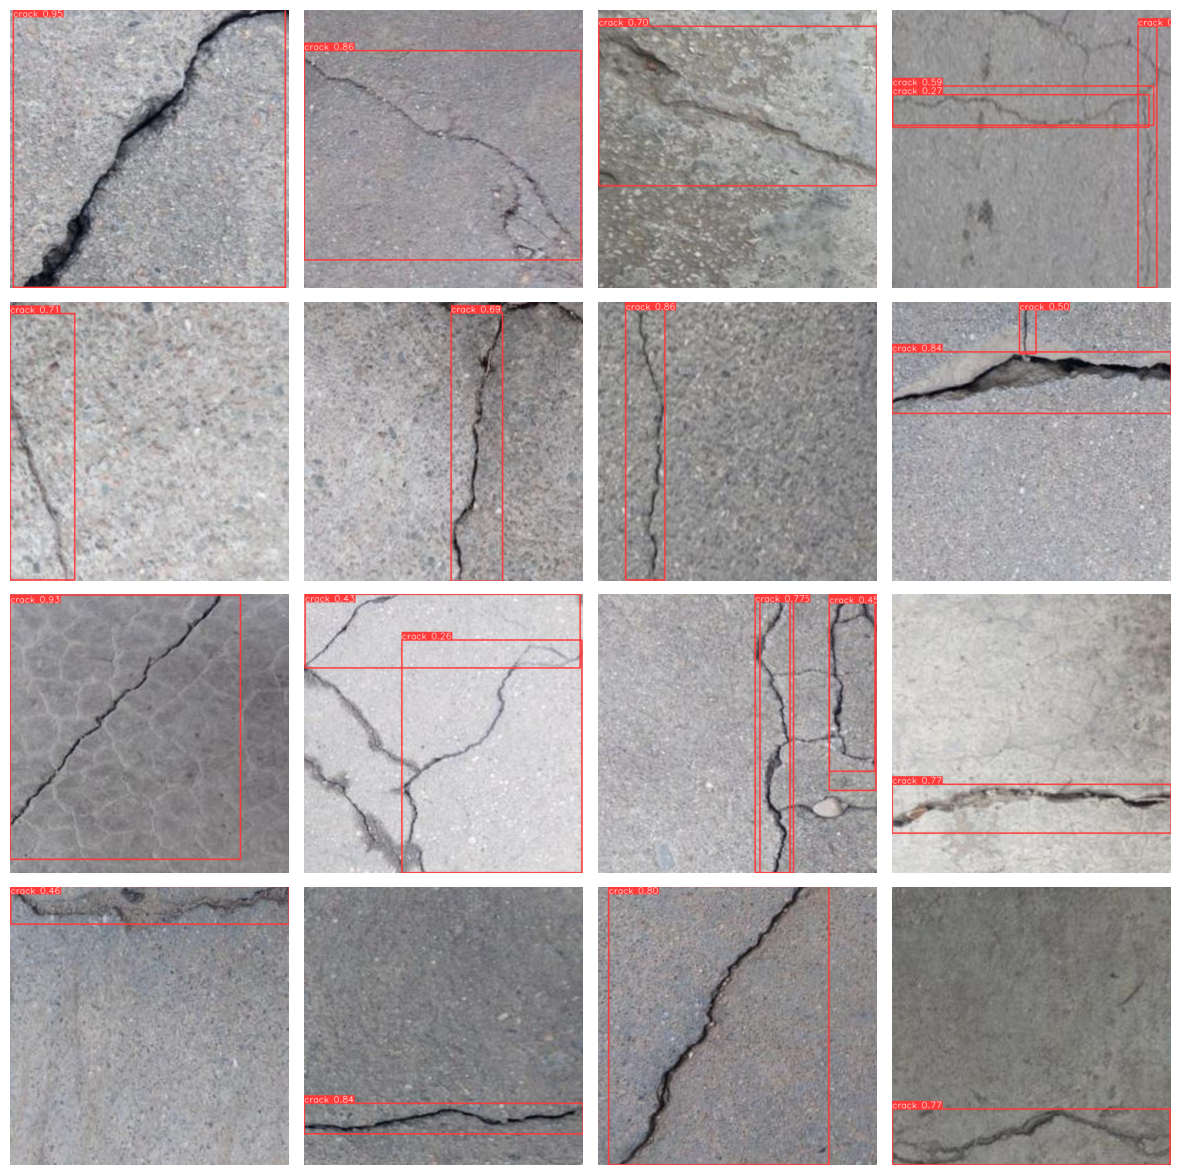

In [12]:
v10_trained = YOLO('/content/ft_models/yolo_v10/weights/best.pt')
# Create a figure with subplots for each image
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

for i, img_file in enumerate(selected_images):

    # Compute the row and column index of the current subplot
    row_idx = i // 4
    col_idx = i % 4

    # Load the current image and run object detection
    img_path = os.path.join(custom_image_dir, img_file)
    detect_img = crack_detection(img_path, v10_trained)

    # Plot the current image on the appropriate subplot
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()


0: 640x640 1 crack, 34.8ms
Speed: 2.6ms preprocess, 34.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 crack, 34.4ms
Speed: 2.5ms preprocess, 34.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 crack, 34.3ms
Speed: 2.0ms preprocess, 34.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 crack, 34.4ms
Speed: 2.6ms preprocess, 34.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 crack, 34.4ms
Speed: 2.7ms preprocess, 34.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 cracks, 34.4ms
Speed: 2.8ms preprocess, 34.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 crack, 22.0ms
Speed: 1.9ms preprocess, 22.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 crack, 22.0ms
Speed: 2.0ms preprocess, 22.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

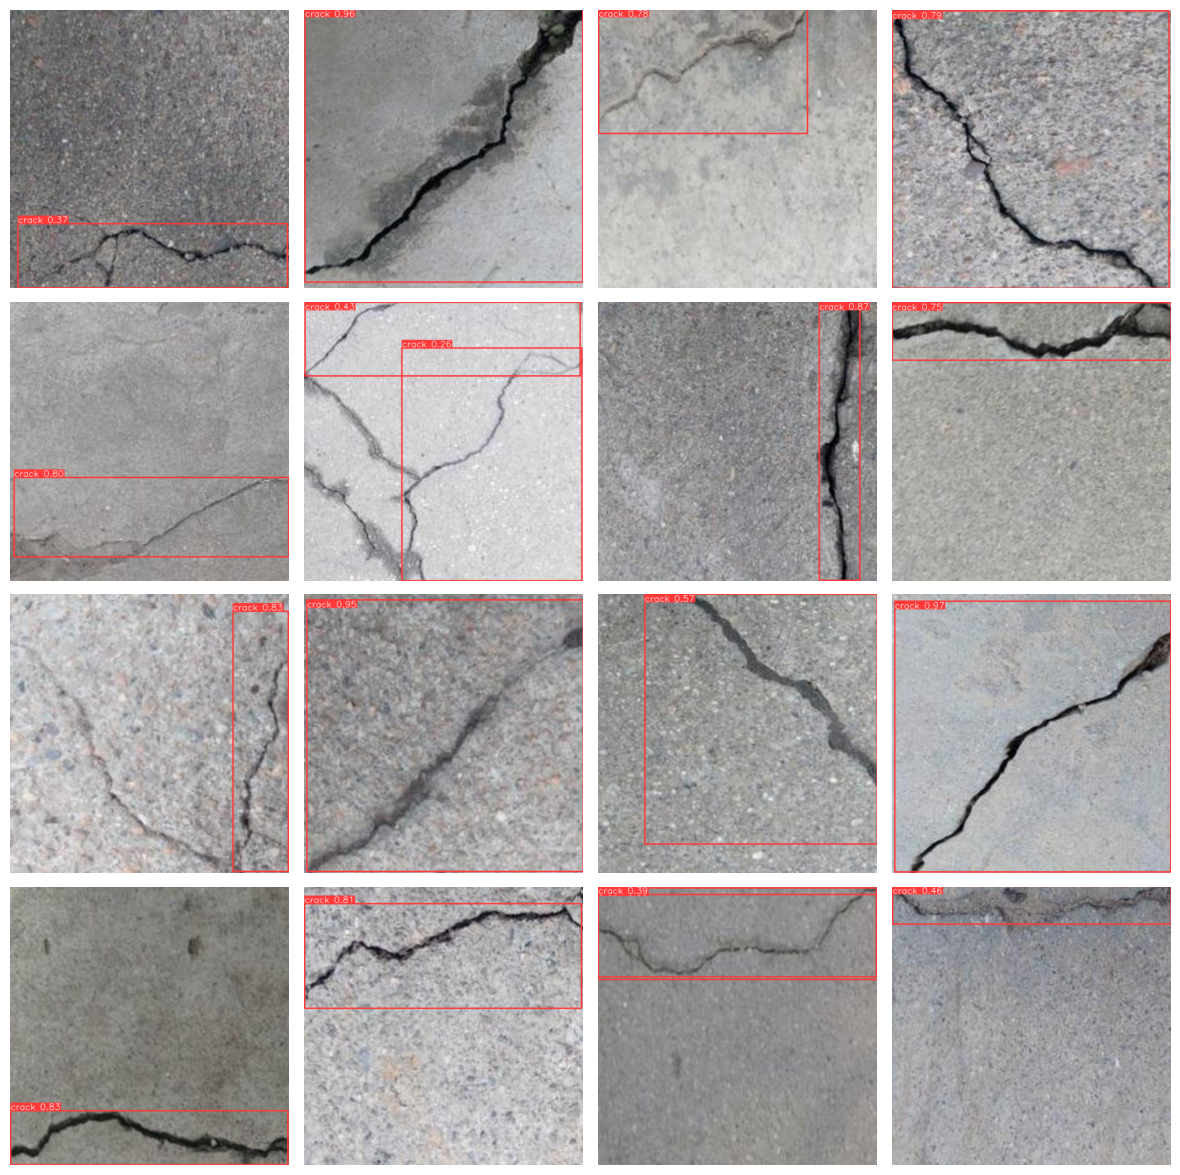

In [13]:
selected_indexes = [2, 5, 8, 12, 15, 18, 20, 22, 25, 30, 35, 42, 45, 50, 55, 60]

# Create a figure with subplots for each image
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

for i, idx in enumerate(selected_indexes):

    # Compute the row and column index of the current subplot
    row_idx = i // 4
    col_idx = i % 4

    # Load the current image and run object detection
    img_file = os.listdir(custom_image_dir)[idx]
    img_path = os.path.join(custom_image_dir, img_file)
    detect_img = crack_detection(img_path, v10_trained)  # Adjust function name as needed

    # Plot the current image on the appropriate subplot
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()

# Evaluatin results of YOLOV10 model

In [14]:
training_results = pd.read_csv("/content/ft_models/yolo_v10/results.csv")
list_column = [col.strip() for col in training_results.columns]
training_results.columns = list_column

training_results

epoch  train/box_om  train/cls_om  train/dfl_om  train/box_oo  \
0       1       1.54390       2.06630        1.7624       1.51010   
1       2       1.45870       1.77190        1.6816       1.54710   
2       3       1.44410       1.71930        1.6605       1.49300   
3       4       1.42420       1.70550        1.6602       1.50110   
4       5       1.38760       1.67410        1.6196       1.43510   
5       6       1.34850       1.63850        1.6051       1.40160   
6       7       1.33540       1.58110        1.5760       1.39400   
7       8       1.34520       1.61850        1.5938       1.41560   
8       9       1.29740       1.57490        1.5648       1.35860   
9      10       1.29190       1.56120        1.5504       1.32090   
10     11       1.23860       1.49590        1.5158       1.28970   
11     12       1.23400       1.45370        1.5053       1.27780   
12     13       1.22930       1.44470        1.4872       1.27920   
13     14       1.21000       1.43550        1.4845       1.27700   
14     15       1.12880       1.38310        1.4418       1.22200   
15     16       1.16770       1.40020        1.4559       1.24310   
16     17       1.13760       1.36510        1.4416       1.20650   
17     18       1.11550       1.34960        1.4423       1.19200   
18     19       1.07830       1.30790        1.3988       1.17470   
19     20       1.16140       1.33680        1.4521       1.21750   
20     21       1.12520       1.32670        1.4124       1.17110   
21     22       1.09780       1.32000        1.4160       1.16200   
22     23       1.07690       1.26470        1.4242       1.15540   
23     24       1.06920       1.27840        1.4101       1.13080   
24     25       1.05330       1.21980        1.3701       1.11720   
25     26       1.05260       1.22660        1.3747       1.11740   
26     27       1.02840       1.21240        1.3785       1.10450   
27     28       1.06180       1.26420        1.3937       1.12880   
28     29       1.02530       1.21800        1.3743       1.11330   
29     30       1.01040       1.19920        1.3539       1.09170   
30     31       1.01830       1.15610        1.3517       1.10100   
31     32       1.00810       1.18590        1.3404       1.08800   
32     33       1.01400       1.16180        1.3423       1.07400   
33     34       0.99233       1.16220        1.3439       1.06640   
34     35       0.95988       1.11830        1.3169       1.02300   
35     36       0.95860       1.13580        1.3186       1.01900   
36     37       0.96865       1.13070        1.3483       1.03250   
37     38       0.95721       1.11820        1.3276       1.00930   
38     39       0.96397       1.12170        1.3139       1.02040   
39     40       0.93172       1.11470        1.3013       1.00660   
40     41       0.97449       1.05530        1.3987       1.05490   
41     42       0.92001       0.88732        1.3305       1.01070   
42     43       0.89325       0.79577        1.3273       0.96238   
43     44       0.86495       0.78131        1.2876       0.97058   
44     45       0.85337       0.78977        1.2919       0.93378   
45     46       0.83098       0.77151        1.2860       0.89403   
46     47       0.80227       0.75683        1.2549       0.87819   
47     48       0.81191       0.73495        1.2652       0.89680   
48     49       0.82003       0.71293        1.2638       0.88833   
49     50       0.78423       0.70237        1.2384       0.87285   

    train/cls_oo  train/dfl_oo  metrics/precision(B)  metrics/recall(B)  \
0        2.65450        1.7334               0.33188            0.27689   
1        1.94490        1.6855               0.09878            0.10811   
2        1.94740        1.6515               0.17138            0.20946   
3        1.93260        1.6449               0.18912            0.15541   
4        1.98070        1.5948               0.36209            0.19257   
5        1.95290        1.5713    

In [15]:
# Training and Validation Loss
# Data Visualization dependencies
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from IPython.display import Image, display
# Create Subplot
fig = make_subplots(
        rows=1, cols=3,
        subplot_titles=["Localization Loss", "Classification Loss", "Distributional Focal Loss"],
)

# Configuration Plot
class PlotCFG:
    marker_size = 6
    line_size = 2
    train_color = "#1e3772"
    valid_color = "#2788f9"

loss_list = ["box_om", "cls_om", "dfl_om"]
for i, loss in enumerate(loss_list):
    fig.add_trace(
        go.Scatter(
            x=np.arange(1, training_results.shape[0]+1), y=training_results["train/{}".format(loss)],
            mode="markers+lines",
            marker=dict(
                color=PlotCFG.train_color, size=PlotCFG.marker_size, line=dict(color="White", width=0.5)
            ),
            line=dict(color=PlotCFG.train_color, width=PlotCFG.line_size),
            name="Training"
        ), row=1, col=i+1
    )
    fig.add_trace(
        go.Scatter(
            x=np.arange(1, training_results.shape[0]+1), y=training_results["val/{}".format(loss)],
            mode="markers+lines",
            marker=dict(
                color=PlotCFG.valid_color, size=PlotCFG.marker_size, line=dict(color="White", width=0.55)
            ),
            line=dict(color=PlotCFG.valid_color, width=PlotCFG.line_size),
            name="Validation"
        ), row=1, col=i+1
    )

# Update Axes
ticklabels = ["Box Loss", "Cls Loss", "DFL Loss"]
for i, ticklabel in enumerate(ticklabels):
    fig.update_xaxes(title="Epochs", linecolor="Black", ticks="outside", row=1, col=i+1)
    fig.update_yaxes(title=ticklabel, linecolor="Black", ticks="outside", row=1, col=i+1)

# Update Layout
fig.update_layout(
    title="Training and Validation Loss", title_x=0.5, font_family="Trebuchet MS",
    width=950, height=350,
    showlegend=False,
    plot_bgcolor="White",
    paper_bgcolor="White"
)

# Show
fig.show(iframe_connected=True)

In [16]:
# Validation Metrics

# Create Subplot
subplot_titles = ["Precision", "Recall", "mAP50", "mAP50-95"]
fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=subplot_titles,
)

# Configuration Plot
class PlotCFG:
    marker_size = 7
    line_size = 2
    train_color = "#1e3772"
    valid_color = "#2788f9"

metrics = ["precision", "recall", "mAP50", "mAP50-95"]
for i, metric in enumerate(metrics):
    # Plot
    fig.add_trace(
        go.Scatter(
            x=np.arange(1, training_results.shape[0]+1), y=training_results["metrics/{}(B)".format(metric)],
            mode="markers+lines",
            marker=dict(
                color=PlotCFG.valid_color, size=PlotCFG.marker_size, line=dict(color="White", width=0.5)
            ),
            line=dict(color=PlotCFG.valid_color, width=PlotCFG.line_size),
            name="Validation"
        ), row=(i//2)+1, col=(i%2)+1
    )

    # Update Axes
    fig.update_xaxes(title="Epochs", linecolor="Black", ticks="outside", row=(i//2)+1, col=(i%2)+1)
    fig.update_yaxes(title=subplot_titles[i], linecolor="Black", ticks="outside", row=(i//2)+1, col=(i%2)+1)

# Update Layout
fig.update_layout(
    title="Validation Metrics", title_x=0.5, font_family="Trebuchet MS",
    width=950, height=600,
    showlegend=False,
    plot_bgcolor="White",
    paper_bgcolor="White"
)

# Show
fig.show(iframe_connected=True)

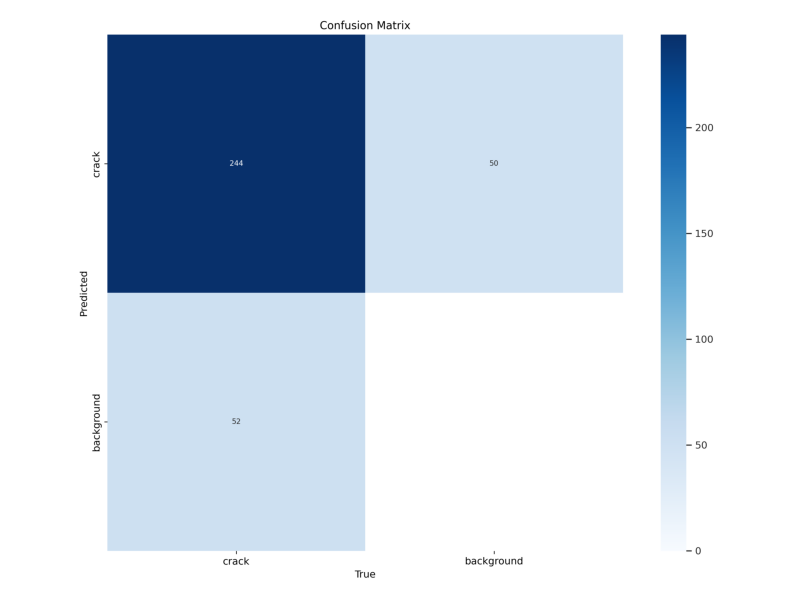

In [18]:
#Testing Metrics
# Confusion Matrix
fig = plt.figure(figsize=(10, 9))
cm_img = mpimg.imread("/content/ft_models/yolo_v10/confusion_matrix.png")
plt.imshow(cm_img)
plt.axis("off")
fig.show()

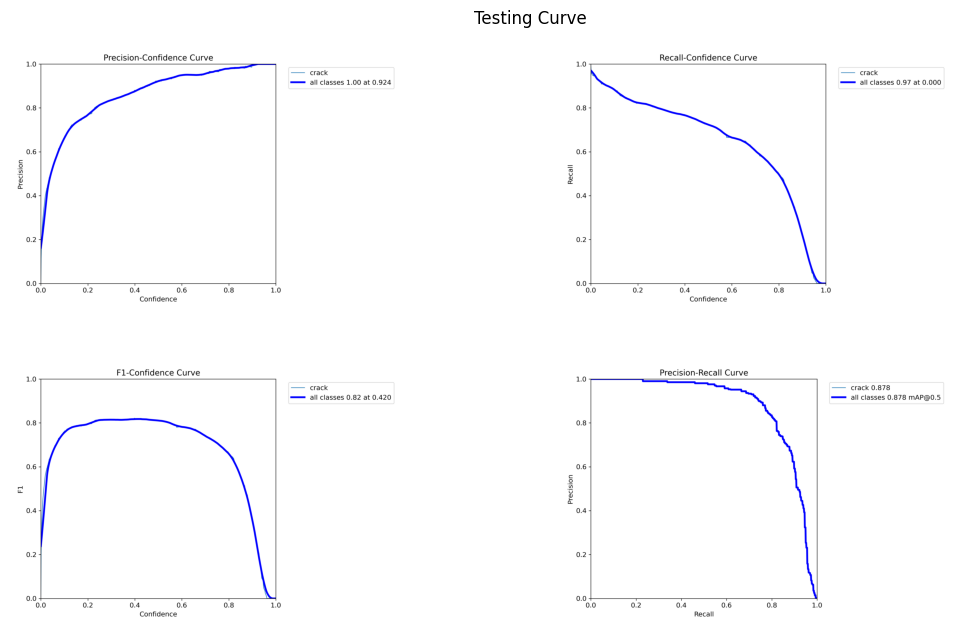

In [20]:
# Testing Curve
fig, axs = plt.subplots(2, 2, figsize=(13, 7.5))
curve_list = ["P_curve", "R_curve", "F1_curve", "PR_curve"]
for i, curve in enumerate(curve_list):
    curve_path = "/content/ft_models/yolo_v10/{}.png".format(curve)
    curve_img = mpimg.imread(curve_path)
    axs[i//2, i%2].imshow(curve_img)
    axs[i//2, i%2].axis('off')

# Title
plt.suptitle("Testing Curve", x=0.55, y=0.93)

# Show
plt.show()

In [ ]:
model.names[]

{0: 'crack'}

In [21]:
# Define colors for each class
colors = {
    'crack': (255, 0, 0),  # red
}